In [1]:
import numpy as np
#import mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
np.shape(x_train)

(60000, 28, 28)

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
x_train[1000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
x_train = np.expand_dims(x_train, axis=3)

In [8]:
np.shape(x_train)

(60000, 28, 28, 1)

In [9]:
x_train[1000]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [10]:
x_test = np.expand_dims(x_test, axis=3)

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

In [13]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [15]:
y_train_ohe[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
history = model.fit(x_train, y_train_ohe, epochs=7, validation_data=(x_test, y_test_ohe), batch_size=300)

Epoch 1/7
200/200 [==============================] - 64s 317ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0376 - val_accuracy: 0.9879
Epoch 2/7
200/200 [==============================] - 65s 324ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0341 - val_accuracy: 0.9896
Epoch 3/7
200/200 [==============================] - 63s 316ms/step - loss: 0.0210 - accuracy: 0.9937 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 4/7
200/200 [==============================] - 58s 288ms/step - loss: 0.0179 - accuracy: 0.9947 - val_loss: 0.0342 - val_accuracy: 0.9888
Epoch 5/7
200/200 [==============================] - 42s 211ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0294 - val_accuracy: 0.9907
Epoch 6/7
200/200 [==============================] - 42s 209ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 7/7
200/200 [==============================] - 51s 254ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0384 - val_accuracy:

In [17]:
import matplotlib.pyplot as plt

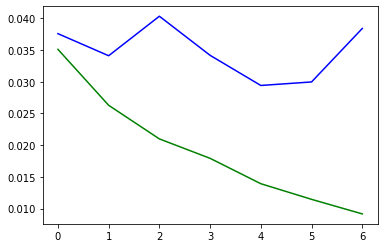

In [21]:
plt.plot(history.history['loss'], color='green', label='Train Data')
plt.plot(history.history['val_loss'], color='blue', label='Validation Data')

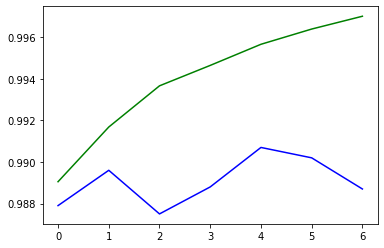

In [22]:
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Data')